   # Анализ показателей поездок сервиса аренды самокатов GoFast

В основных данных есть информация о пользователях, их поездках и подписках:

 1. Пользователи: 
  - **user_id** - уникальный идентификатор пользователя
  - **name** - имя пользователя
  - **age** - возраст
  - **city** - город
  - **subscription_type** - тип подписки (free, ultra)
 2. Поездки:
  - **user_id** - уникальный идентификатор пользователя
  - **distance** - расстояние, которое пользователь проехал в текущей сессии (в метрах)
  - **duration** - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
  - **date** - дата совершения поездки
 3. Подписки:
  - **subscription_type** - тип подписки
  - **minute_price** - стоимость одной минуты поездки по данной подписке
  - **start_ride_price** - стоимость начала поездки
  - **subscription_fee** - стоимость ежемесячного платежа

In [1]:
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import pandas as pd

In [2]:
try:
    data_users = pd.read_csv('/datasets/data1.csv')
    data_rides = pd.read_csv('/datasets/data2.csv')
    data_subscriptions = pd.read_csv('/datasets/data3.csv')
except:
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/data1.csv')
    data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/data2.csv')
    data_subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/data3.csv')


#### Шаг 1. Загрузка данных

In [3]:
data_users.info()
data_users.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
data_rides.info()
data_rides.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
data_subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


***Вывод:***

В этой части мы изучили общую информацию о трех датасетах. Выяснили, какой объем данных имеется, какие показатели есть в таблице, типы столбцов. Пропусков в данных нет. На основании этой информации будем обрабатывать данные ниже.

#### Шаг 2. Предобработка данных

In [6]:
# Меняем тип столбца даты в data_rides, добавляем столбец
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
data_rides['month'] = data_rides['date'].dt.month
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [7]:
data_users.isna().sum()
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [8]:
# Удаляем дубликаты
data_users.duplicated().sum()

31

In [9]:
data_users = data_users.drop_duplicates().reset_index(drop=True)
data_users.duplicated().sum()

0

In [10]:
data_rides = data_rides.query('duration > 1 or duration.isna()')
data_rides

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


***Вывод:***

 - В ходе предобработки данные были проверены на дубликаты, в датасете data_users - удалены. 
 - В датасете data_rides столбец date приведен к типу datetime, и создан отдельный столбец month для дальнейшей работы
 - Удалены строки с аномальными значениями - временем поездки меньше минуты

#### Шаг 3. Исследовательский анализ данных

,user_id
city,
Москва,168
Тюмень,180
Омск,183
Сочи,189
Краснодар,193
Ростов-на-Дону,198
Екатеринбург,204
Пятигорск,219


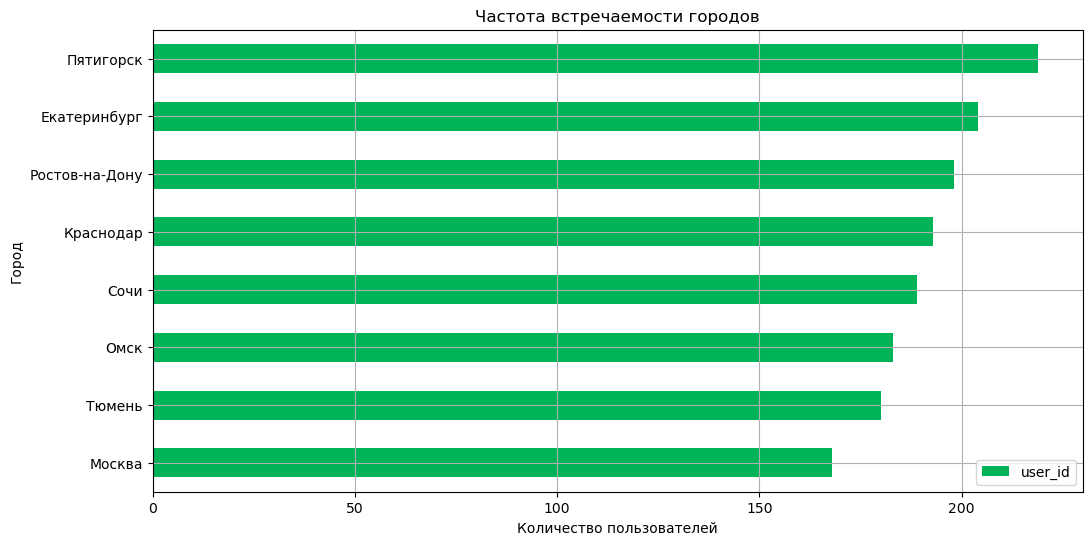

In [11]:
# Частота встречаемости городов

cities = data_users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values('user_id')
display(cities)
cities.plot(grid=True, kind='barh', figsize=(12, 6), color='#00B358');
plt.xlabel('Количество пользователей');
plt.ylabel('Город');
plt.title('Частота встречаемости городов');

 - Данные собраны из 8 городов
 - Самый частовстречающийся город - Пятигорск, значит там совершается самое большое число поездок на самокатах GoFast

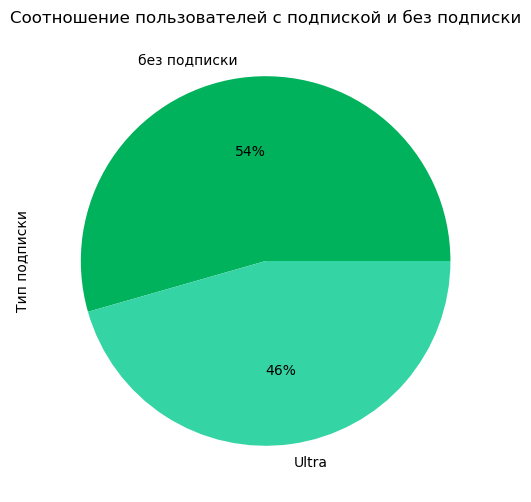

In [12]:
# Соотношение пользователей с подпиской и без подписки

data_users['subscription_type'].value_counts().plot(grid=True, kind='pie', \
                                                    title='Соотношение пользователей с подпиской и без подписки', \
                                                    label='Тип подписки', \
                                                    labels=['без подписки', 'Ultra'], \
                                                    figsize=(6, 6), autopct='%1.0f%%', colors=['#00B25C', '#35D4A4']);

 - Без подписки (54%) несколько больше пользователей, чем с подпиской (46%)

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


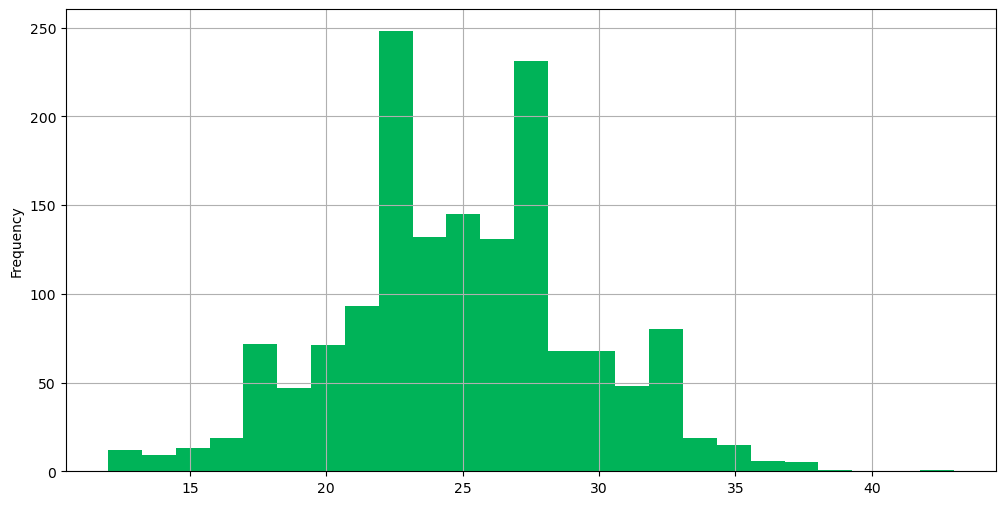

In [13]:
# Возраст пользователей

print(data_users['age'].describe())
data_users['age'].plot(bins=25, grid=True, kind='hist', figsize=(12, 6), color='#00B358');

 - Средний возраст пользователей самокатами - 25 лет
 - На графике мы видим, что самый частовстречающийся возраст это 23 и 27 лет

,distance
count,1534.000000
mean,3127.331593
std,345.475529
min,1234.763317
25%,2909.353325
50%,3127.112770
75%,3335.761246
max,4395.430303


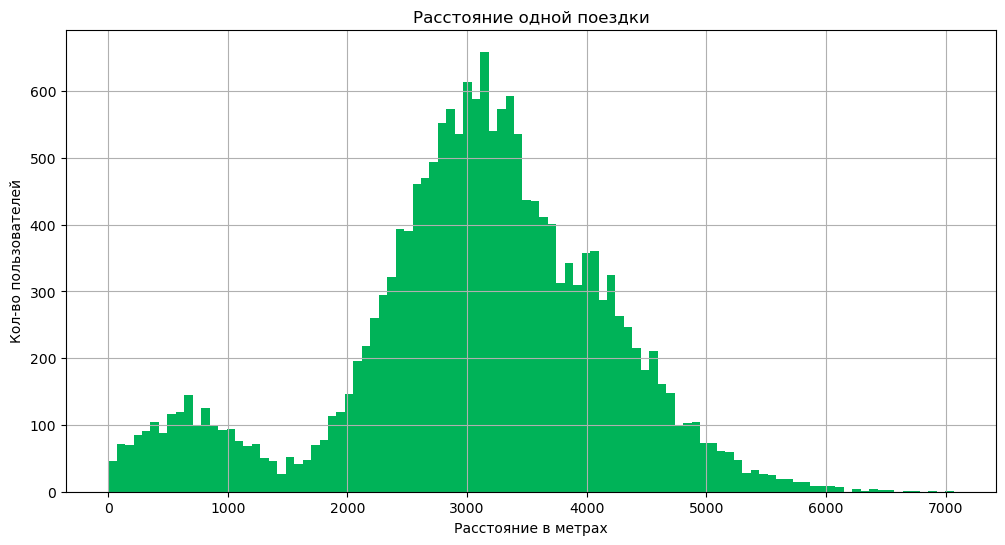

In [14]:
# Расстояние, которое пользователь преодолел за одну поездку
# сделаем сводную таблицу по медиане поездок одного пользователя (группируем по пользователю)

data_rides['distance'].plot(grid=True, bins=100, kind='hist', figsize=(12, 6), color='#00B358');
plt.title('Расстояние одной поездки');
plt.xlabel('Расстояние в метрах');
plt.ylabel('Кол-во пользователей');
data_rides_distance = data_rides.pivot_table(index='user_id', values='distance', aggfunc='median')
data_rides_distance.describe()

 - Значение медианы около 3130 метров
 - Большая часть поездок это поездки на расстояние от 2900 до 3350 метров
 - Есть небольшой пик поездок около 700 метров

,duration
count,1534.000000
mean,17.764891
std,2.315473
min,10.711378
25%,16.222831
50%,17.776070
75%,19.234036
max,29.983174


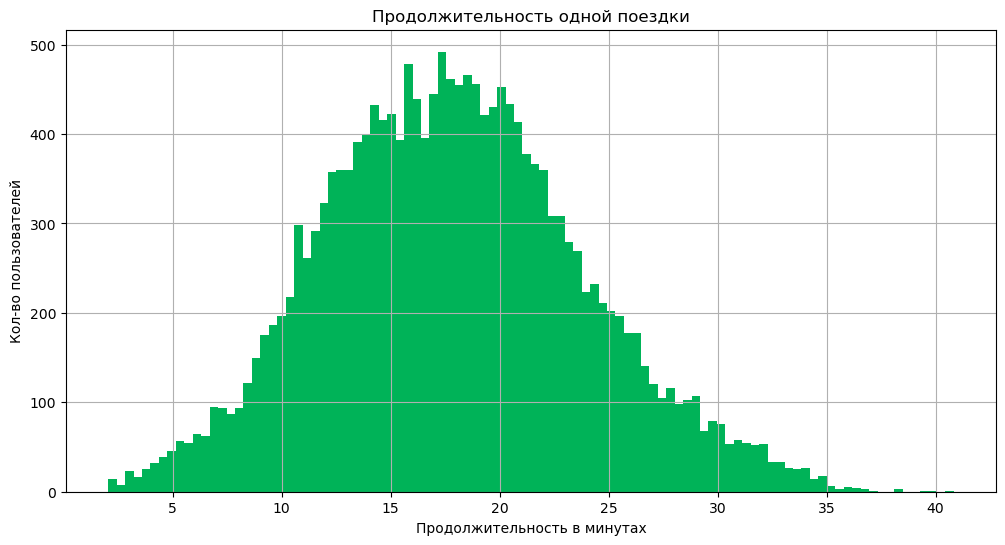

In [15]:
# Продолжительность поездок

data_rides['duration'].plot(grid=True, bins=100, kind='hist', figsize=(12, 6), color='#00B358');
plt.title('Продолжительность одной поездки');
plt.xlabel('Продолжительность в минутах');
plt.ylabel('Кол-во пользователей');

data_rides_duration = data_rides.pivot_table(index='user_id', values='duration', aggfunc='median')
data_rides_duration.describe()

 - Большая часть поездок длится от 10 до 25 минут
 - В среднем на одну поездку уходит 17.5 минут

#### Шаг 4. Объединение данных

In [16]:
# Объединяем по очереди все таблицы, проверяем

data = data_users.merge(data_rides, on='user_id', how='left')
data = data.merge(data_subscriptions, on='subscription_type', how='left')
data['duration'] = np.ceil(data['duration'])
data.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,17.0,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,15.0,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,24.0,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,16.0,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,16.0,2021-11-22,11,6,0,199


In [17]:
# Создаем 2 отдельных датафрейма для пользователей с подпиской и без

data_free = data.query('subscription_type == "free"').reset_index(drop=True)
data_ultra = data.query('subscription_type == "ultra"')

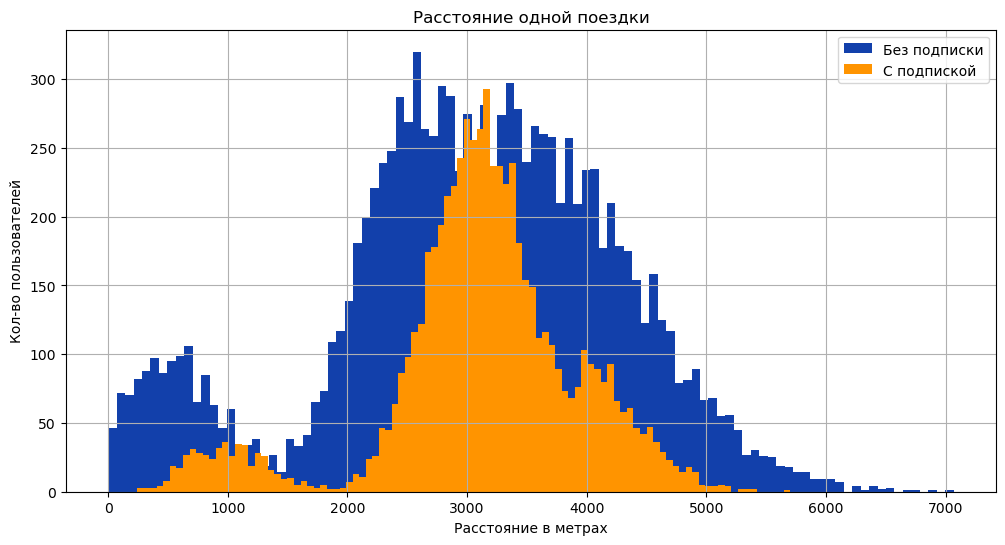

In [18]:
# Расстояния с подпиской и без подписки

data_free['distance'].plot(grid=True, bins=100, kind='hist', figsize=(12, 6), color='#1240AB');
data_ultra['distance'].plot(grid=True, bins=100, kind='hist', figsize=(12, 6), color='#FF9400');
plt.title('Расстояние одной поездки');
plt.legend(['Без подписки', 'С подпиской']);
plt.xlabel('Расстояние в метрах');
plt.ylabel('Кол-во пользователей');

 - Для тех, кто использует самокаты без подписки, характерны расстояния от 2000 до 4500 м
 - Те, кто пользуется подпиской, обычно проезжают от 2500 до 4500 м
 - Для пользователей без подписки пик на графике приходится на меньших расстояниях (2500 м), чем для тех, у кого есть подписка (3100 м)
  - т.е. самое большое количество пользователей без подписки проезжают меньше, чем пользователей с подпиской


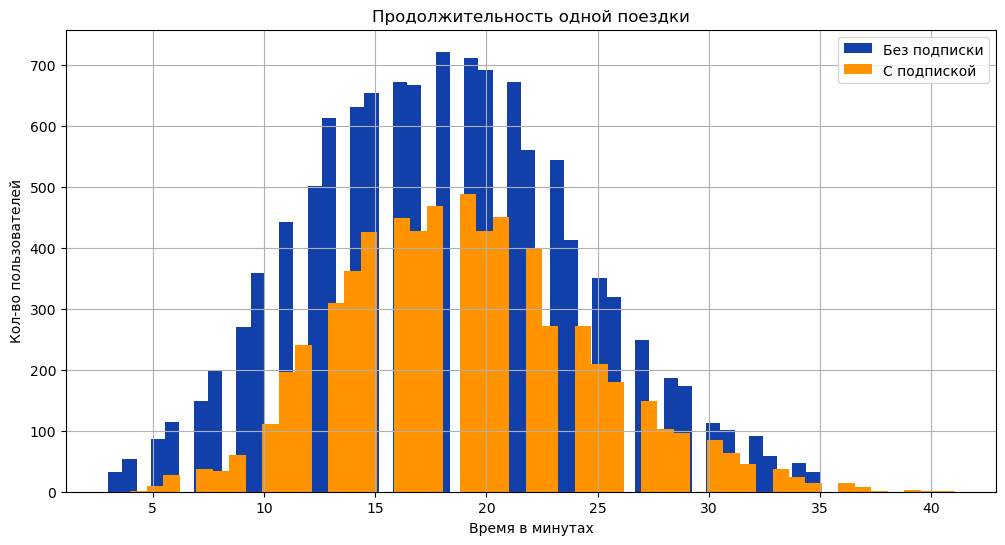

In [19]:
# Время с подпиской и без подписки

data_free['duration'].plot(grid=True, bins=50, kind='hist', figsize=(12, 6), color='#1240AB');
data_ultra['duration'].plot(grid=True, bins=50, kind='hist', figsize=(12, 6), color='#FF9400');
plt.title('Продолжительность одной поездки');
plt.legend(['Без подписки', 'С подпиской']);
plt.xlabel('Время в минутах');
plt.ylabel('Кол-во пользователей');

 - Для тех, кто использует самокаты без подписки, типичная продолжительность поездки 13-25 мин
 - Пользователи с подпиской в среднем тратят на поездку от 14 до 25 мин, есть несколько значений больше 35 мин
 - В целом график времени поездок без подписки смещен немного влево относительно графика времени с подписками, можно предположить, что без подписки пользователи тратят меньше времени на поездку

#### Шаг 5. Подсчёт выручки

In [20]:
# Создаем общий датафрейм с суммарным расстоянием, кол-вом поездок и суммарным временем для каждого пользователя по месяцам

data_merged = (
    data.groupby(['user_id', 'month'])
    .agg({'distance':'sum', 'duration':['sum', 'count'], 
    'subscription_fee':'first', 'minute_price':'first', 'start_ride_price':'first', 'subscription_type':'first'})
)

data_merged.columns = ('distance', 'time_per_month', 'count', 'subscription_fee', 'minute_price', 'start_ride_price', 'subscription_type')
data_merged

distance  time_per_month  count  subscription_fee  \
user_id month                                                          
1       1       7027.511294            42.0      2               199   
        4        754.159807             7.0      1               199   
        8       6723.470560            46.0      2               199   
        10      5809.911100            32.0      2               199   
        11      7003.499363            56.0      3               199   
...                     ...             ...    ...               ...   
1534    6       3409.468534            26.0      2                 0   
        8       7622.453034            48.0      2                 0   
        9       4928.173852            23.0      1                 0   
        11     13350.015305            78.0      4                 0   
        12      2371.711192            16.0      1                 0   

               minute_price  start_ride_price subscription_type  
user_id month                                                    
1       1                 6                 0             ultra  
        4                 6                 0             ultra  
        8                 6                 0             ultra  
        10                6                 0             ultra  
        11                6                 0             ultra  
...                     ...               ...               ...  
1534    6                 8                50              free  
        8                 8                50              free  
        9                 8                50              free  
        11                8                50              free  
        12                8                50              free  

[11300 rows x 7 columns]

In [21]:
data_merged['month_income'] = (
    data_merged['subscription_fee'] + 
    (data_merged['time_per_month']*data_merged['minute_price']) 
    + (data_merged['count']*data_merged['start_ride_price'])
)

data_merged

distance  time_per_month  count  subscription_fee  \
user_id month                                                          
1       1       7027.511294            42.0      2               199   
        4        754.159807             7.0      1               199   
        8       6723.470560            46.0      2               199   
        10      5809.911100            32.0      2               199   
        11      7003.499363            56.0      3               199   
...                     ...             ...    ...               ...   
1534    6       3409.468534            26.0      2                 0   
        8       7622.453034            48.0      2                 0   
        9       4928.173852            23.0      1                 0   
        11     13350.015305            78.0      4                 0   
        12      2371.711192            16.0      1                 0   

               minute_price  start_ride_price subscription_type  month_income  
user_id month                                                                  
1       1                 6                 0             ultra         451.0  
        4                 6                 0             ultra         241.0  
        8                 6                 0             ultra         475.0  
        10                6                 0             ultra         391.0  
        11                6                 0             ultra         535.0  
...                     ...               ...               ...           ...  
1534    6                 8                50              free         308.0  
        8                 8                50              free         484.0  
        9                 8                50              free         234.0  
        11                8                50              free         824.0  
        12                8                50              free         178.0  

[11300 rows x 8 columns]

#### Шаг 6. Проверка гипотез

 1. Проверяем гипотезу: тратят ли пользователи с подпиской больше времени на поездки?
 
 - H0: средняя продолжительность поездки с подпиской равна средней продолжительности поезки без подписки
 - H1: средняя продолжительность поездки с подпиской больше средней продолжительности поезки без подписки
 
    - H0: data_ultra_duration = data_free_duration
    - H1: data_ultra_duration > data_free_duration

In [22]:
data_ultra_duration = data_ultra.pivot_table(index='user_id', values='duration', aggfunc='median')
data_free_duration = data_free.pivot_table(index='user_id', values='duration', aggfunc='median')

alpha = 0.05
results = st.ttest_ind(data_ultra_duration, data_free_duration, alternative='greater', equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: [9.79684554e-17]
Отвергаем нулевую гипотезу


 - Pvalue очень маленький
 - Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки

 2. Проверяем гипотезу: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров
 
 - H0: среднее расстояние поездки с подпиской равно 3130 м.
 - H1: среднее расстояние поездки с подпиской больше 3130 м.
 
    - H0: data_ultra_distance = 3130
    - H1: data_ultra_distance > 3130

In [23]:
data_free_distance = data.query('subscription_type == "free"')['distance']
data_ultra_distance = data.query('subscription_type == "ultra"')['distance']

optimal_value = 3130
alpha = 0.01
results = st.ttest_1samp(data_ultra_distance, optimal_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


 - P-value равен примерно 0.919, нулевую гипотезу не отвергаем
 - Есть основания говорить, что среднее расстояние, которое проезжают пользователи с подпиской статистически значимо не отличается от 3130 метров

 3. Проверяем гипотезу: будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
 - H0: ultra_income = free_income
 - H1: ultra_income > free_income
   - H0: ежемесячная выручка от пользователей с подпиской равна ежемесячной выручке от пользователей без подписки
   - H1: ежемесячная выручка от пользователей с подпиской больше ежемесячной выручки от пользователей без подписки 

In [24]:
ultra_income = data_merged.query('subscription_type == "ultra"')['month_income']
free_income = data_merged.query('subscription_type == "free"')['month_income']
print('Средняя помечясная выручка с подпиской:', ultra_income.mean())
print('Средняя помечясная выручка без подписки:', free_income.mean())

alpha = 0.01
results = st.ttest_ind(ultra_income, free_income, alternative='greater', equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Средняя помечясная выручка с подпиской: 362.7921906022502
Средняя помечясная выручка без подписки: 329.3326437121324
p-value: 2.4970242872858465e-38
Отвергаем нулевую гипотезу


 - P-value очень маленький, нулевую гипотезу отвергаем
 - Есть основания говорить, что ежемесячная выручка от пользователей с подпиской больше ежемесячной выручки от пользователей без подписки

***Задание 6.4***

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

 - Здесь мы будем проверять гипотезу о равенстве средних для зависимых (до и после) выборок. 
   Соответственно нам подойдет метод scipy.stats.ttest_rel() 

***Вывод:***

В ходе исследования было проверено три гипотезы:

 - Тратят ли пользователи с подпиской больше времени на поездки? Результат: есть основания говорить, что пользователи с подпиской тратят больше времени на поездки
 
 - Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Результат: среднее расстояние, которые проезжают пользователи с подпиской за поездку статистически значимо не отличается от оптимального растояния 3130 метров
 
 - Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Результат: есть основания говорить, что ежемесячная выручка от пользователей с подпиской больше ежемесячной выручки от пользователей без подписки

#### Шаг 7. Распределения

In [25]:
from scipy.stats import binom
from math import factorial
from matplotlib.pyplot import figure
from numpy import random
import seaborn as sns

 - Вероятность не выполнить план должна быть 5%, значит вероятность выполнить план должна быть 95% и более

In [31]:
# Подбираем n-значение такое, чтобы prob была равна примерно 95% 

prob = 1 - st.binom.cdf(100, 1180, 0.1)
prob

0.9577078390671807

In [ ]:
n = 1180 
p = 0.1 

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.figure(figsize=(15, 10));
plt.grid(True);
plt.bar(range(0, n + 1), distr);

***Вывод***

Чтобы получить 100 клиентов, продливших подписку, нужно разослать 1180 и больше промокодов

P.S. С визуализацией распределения у меня возникли сложности, не могу понять, как построить график, если известно k, и нужно ли это вообще

In [ ]:
n = 1180 
p = 0.1 

distr = []

# Значения для оси x (количество успехов)
x = range(n + 1)

# Значения для оси y (вероятность)
y = binom.pmf(x, n, p)

    
plt.figure(figsize=(15, 10));
plt.grid(True);
plt.bar(x=x, height=y)
;